# Wine Project

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

from pydataset import data

# # module for visualizations
# import viz_kmeans as vk

# my imports
import lugo_wrangle as w

In [2]:
df = w.get_wine_data()
df_copy = df.copy()

In [3]:
df.shape

(6497, 13)

# NOTES

    - wine quality red:
        1,599 rows
        12 columns
    - wine quality white:
        4,898 rows
        12 columns
    - merged quality:
        6497 rows
        12 columns
        All columns are in float dtype with the exception of the quality
    
    Using a multiplier of 1.5 in the outlier function
    - Total of rows originally: 6,497
    - Total of rows removed: 1,947
    - New total of rows:4,550
    
    Using a multiplier of 2.0 in the outlier function
    - Total of rows originally: 6,497
    - Total of rows removed: 867
    - New total of rows:5,630
   

In [4]:
# preparing the data
df = w.prep_wine_data(df)

In [5]:
# removing the outliers
df = w.execute_outlier(df)

Total of rows originally: 6497
Total of rows removed: 867
New total of rows: 5630


In [6]:
# using multiplier of 2 we end up with w-4591 and r-1039
# using multiplier of 1.5 we end up with w-4215 and r-335
df.wine_type.value_counts()

white_wine    4591
red_wine      1039
Name: wine_type, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5630 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         5630 non-null   float64
 1   volatile_acidity      5630 non-null   float64
 2   citric_acid           5630 non-null   float64
 3   residual_sugar        5630 non-null   float64
 4   chlorides             5630 non-null   float64
 5   free_sulfur_dioxide   5630 non-null   float64
 6   total_sulfur_dioxide  5630 non-null   float64
 7   density               5630 non-null   float64
 8   ph                    5630 non-null   float64
 9   sulphates             5630 non-null   float64
 10  alcohol               5630 non-null   float64
 11  quality               5630 non-null   int64  
 12  wine_type             5630 non-null   object 
 13  wine_type_white_wine  5630 non-null   uint8  
dtypes: float64(11), int64(1), object(1), uint8(1)
memory usage: 621.3+ KB


In [8]:
w.nulls_by_col(df)

,num_rows_missing,percent_rows_missing
fixed_acidity,0,0.0
volatile_acidity,0,0.0
citric_acid,0,0.0
residual_sugar,0,0.0
chlorides,0,0.0
free_sulfur_dioxide,0,0.0
total_sulfur_dioxide,0,0.0
density,0,0.0
ph,0,0.0
sulphates,0,0.0


In [9]:
# list of columns
cols = ['fixed_acidity','volatile_acidity','citric_acid'
        ,'residual_sugar','chlorides','free_sulfur_dioxide'
       ,'total_sulfur_dioxide','density','ph','sulphates'
        ,'alcohol','quality','wine_type','wine_type_white_wine']

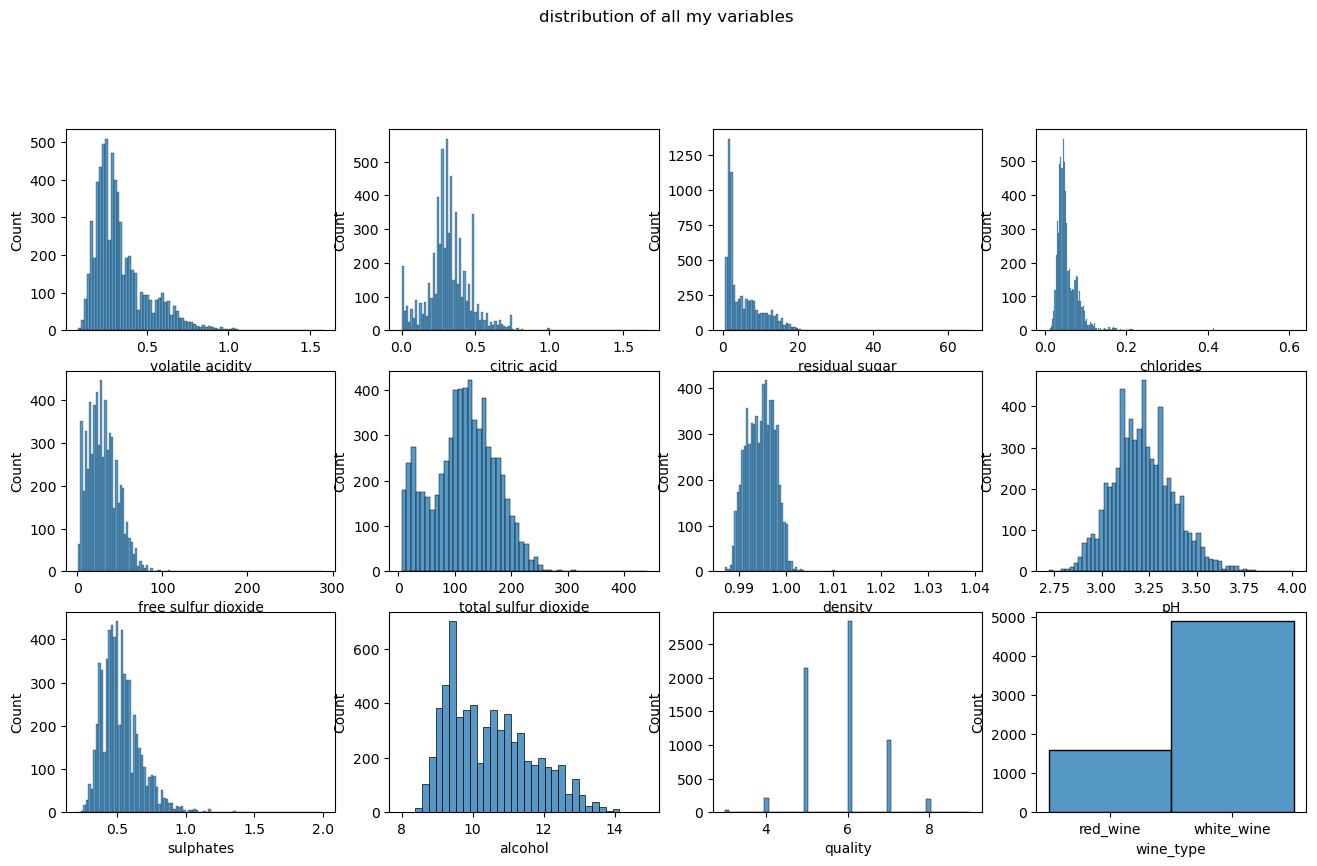

In [10]:
plt.figure(figsize=(16,12))

#enumerate gives us the index of what we are iterating over
# as well as the iteration of the df.columns
for i, cols in enumerate(df_copy.columns[1:]):
    # print(i, cols)

    plt.subplot(4,4,i+1)
    sns.histplot(df_copy[cols])

plt.suptitle('distribution of all my variables')
plt.show()

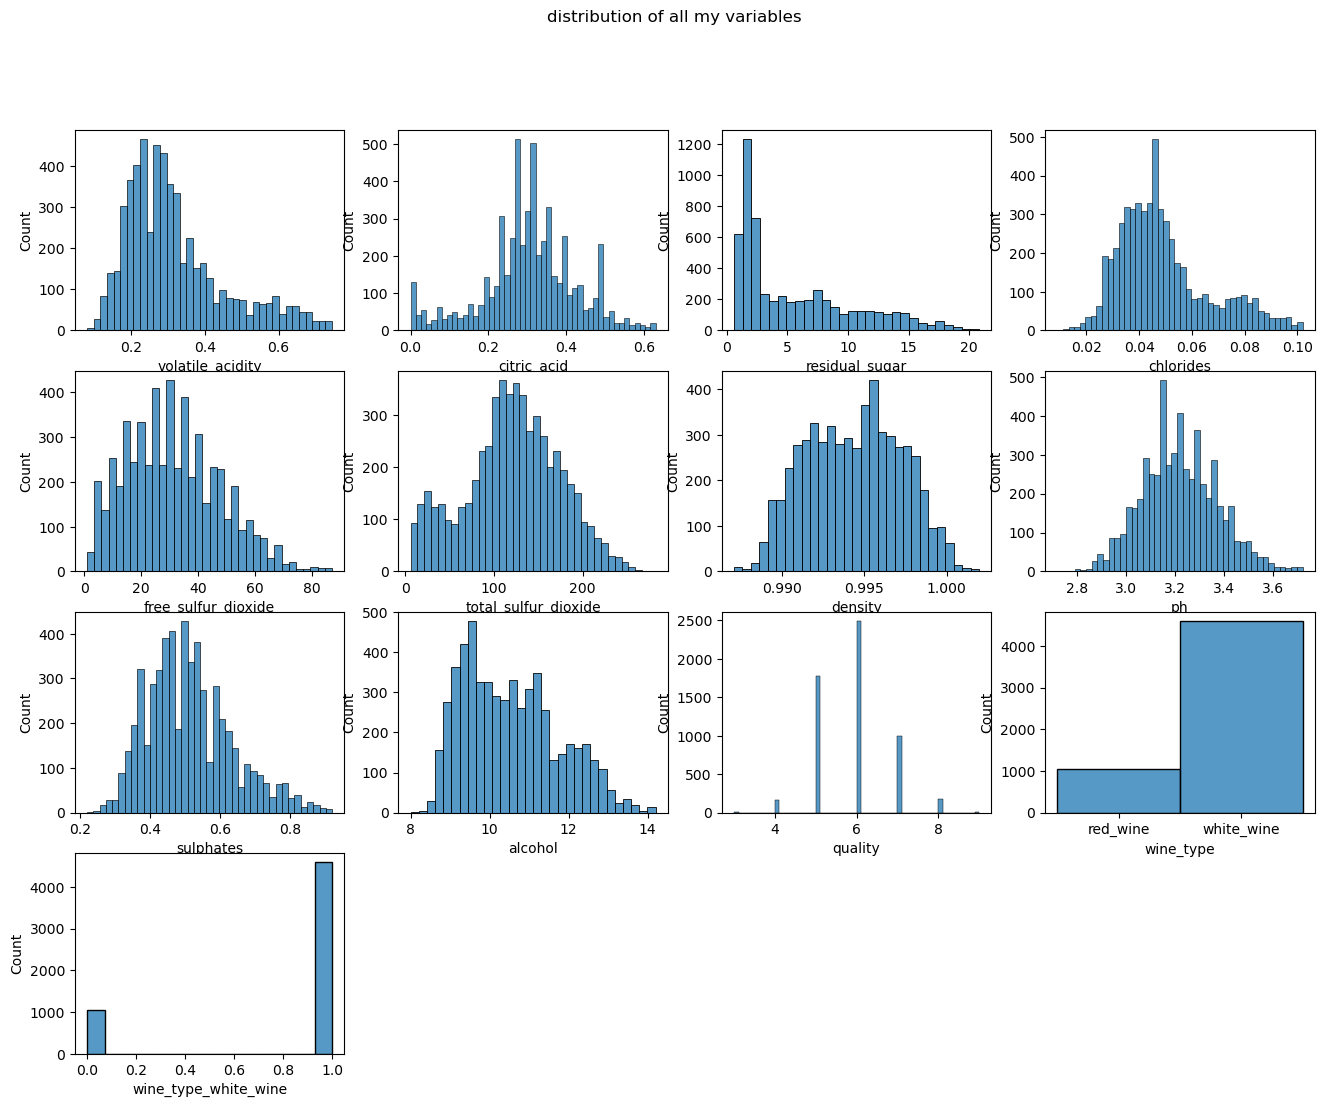

In [11]:
plt.figure(figsize=(16,12))

#enumerate gives us the index of what we are iterating over
# as well as the iteration of the df.columns
for i, cols in enumerate(df.columns[1:]):
    # print(i, cols)

    plt.subplot(4,4,i+1)
    sns.histplot(df[cols])

plt.suptitle('distribution of all my variables')
plt.show()

In [12]:
# dropping these columns for right now until I find a use for them
# df = df.drop(columns =['wine_type','wine_type_white_wine'])
df = df.drop(columns =['wine_type'])

In [13]:
tr, val, ts = w.get_split(df)
tr.shape, val.shape, ts.shape

((3378, 13), (1126, 13), (1126, 13))

In [14]:
col_list = list(df.drop(columns=['quality']).columns)

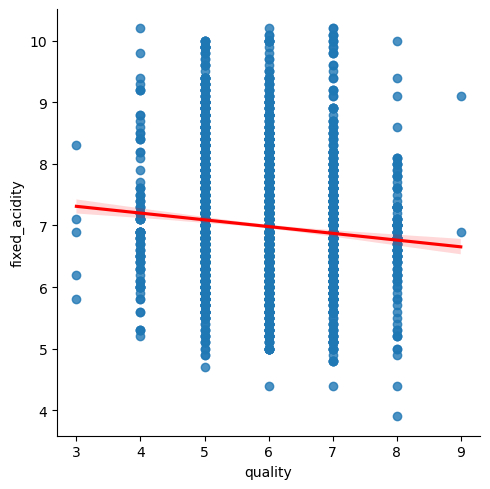

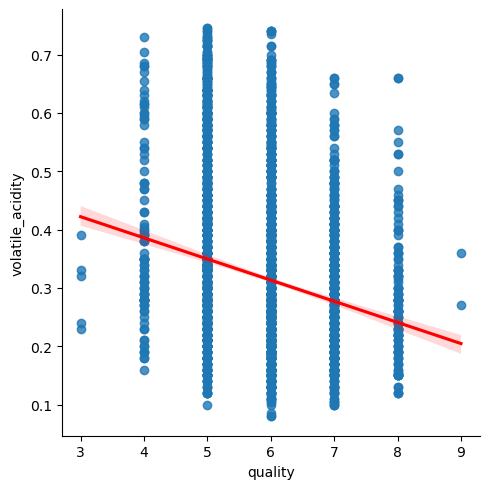

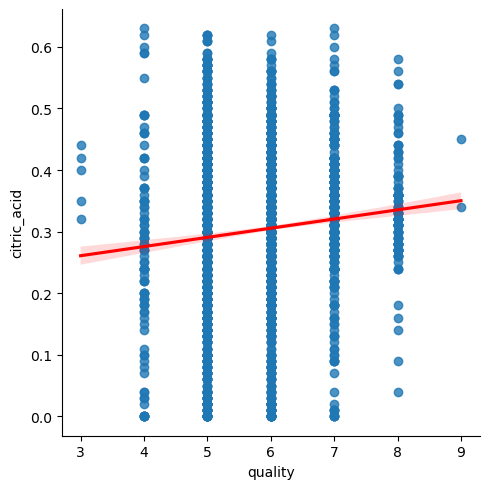

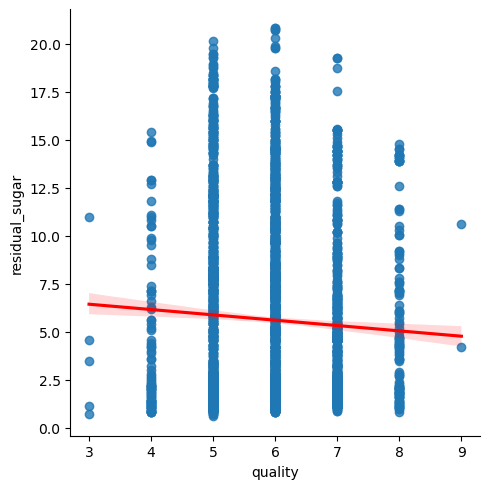

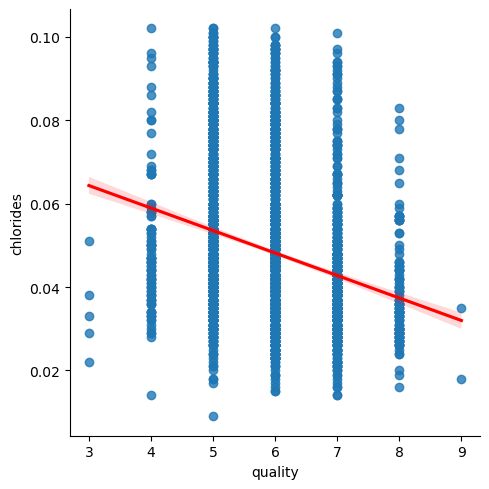

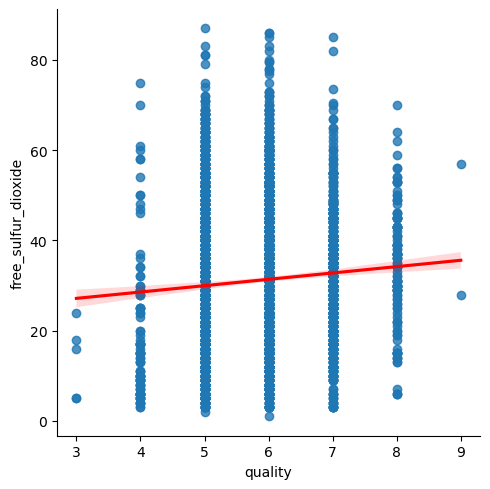

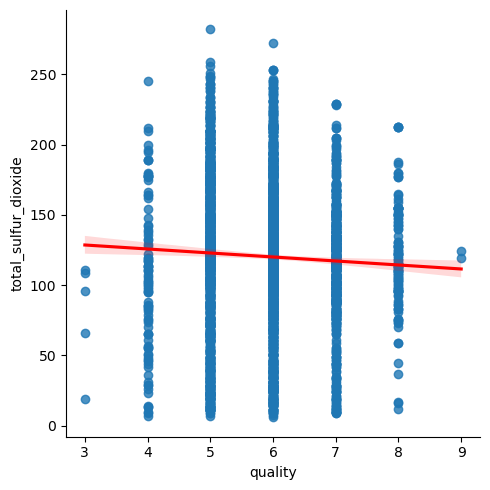

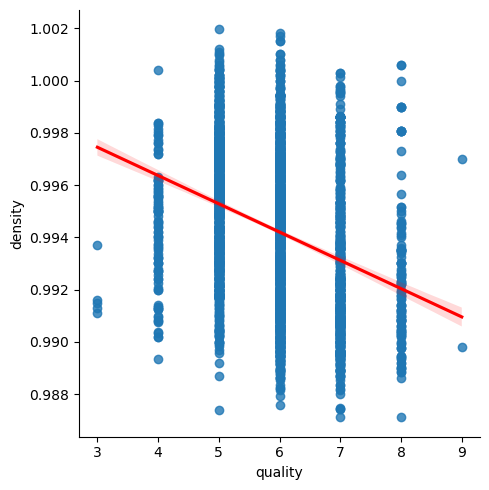

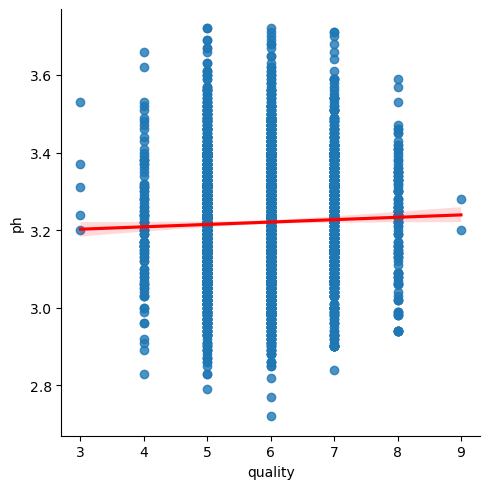

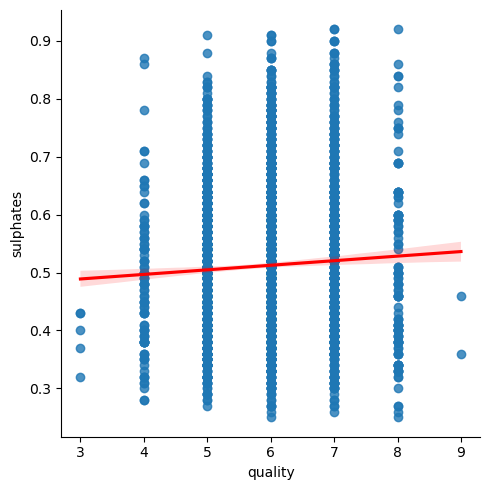

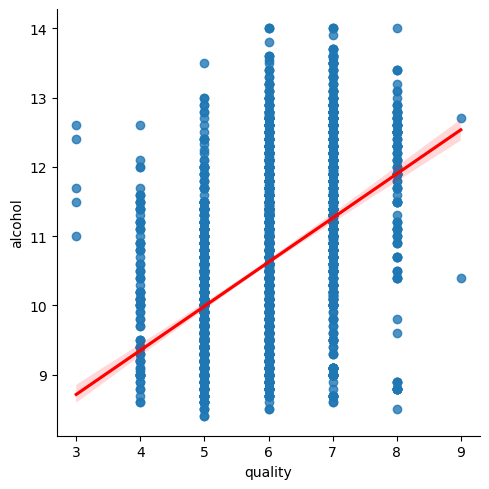

In [15]:
# for col in col_list[:-1]:
#     sns.barplot(data = tr, x='quality', y=col)
#     plt.title('all wine')
#     plt.show()

# sns.pairplot(data = tr,corner=True)
# plt.title('all wine')
# plt.show()

for col in col_list[:-1]:
    sns.lmplot(data=tr, x='quality', y=col, line_kws={'color':'red'})
    plt.show()

# plt.figure(figsize=(16,6))
# sns.boxplot(data=df.drop(columns='quality'))
# plt.title('Distribution of values for columns')
# plt.show()

In [16]:
target = 'quality'

In [17]:
X_tr, X_val, X_ts, y_tr, y_val, y_ts, to_scale, baseline = w.get_Xs_ys_to_scale_baseline(tr, val, ts, target)

In [18]:
X_tr_sc, X_val_sc, X_ts_sc = w.scale_data(X_tr,X_val,X_ts,to_scale)

In [19]:
metrics_df, pred_lr_rfe_tr, pred_lr_tr, pred_lars_tr, pred_pr_tr, pred_glm_tr = w.get_models_dataframe(baseline,tr,y_tr,y_val,y_ts,X_tr_sc,X_val_sc,X_ts_sc)
metrics_df

,model,rmse train,rmse validate,R2 validate
0,baseline,0.870642,,0.000000
1,ols+RFE,0.745488,0.732004,0.261672
2,ols,0.726417,0.720004,0.285680
3,lars,0.870642,0.852255,-0.000832
4,poly_2D,0.672154,0.695087,0.334266
5,glm,0.841822,0.824497,0.063299


In [20]:
# testing the best model 'poly_2D'
result = w.test_best_model(X_ts_sc, y_ts, X_tr_sc, y_tr)
result

,model Poly_2D,rmse,r2
0,test,0.713094,0.305323


In [21]:
top_k_rfe, X_tr_rfe, X_val_rfe = w.rfe(X_tr_sc,X_val_sc,y_tr,k=3)
top_k_rfe

Index(['volatile_acidity', 'free_sulfur_dioxide', 'alcohol'], dtype='object')

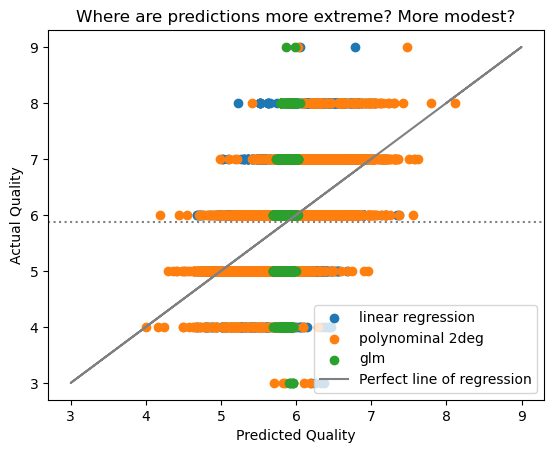

In [30]:
plt.scatter(pred_lr_tr, y_tr, label='linear regression')
plt.scatter(pred_pr_tr, y_tr, label='polynominal 2deg')
plt.scatter(pred_glm_tr, y_tr, label='glm')
plt.plot(y_tr, y_tr, label='Perfect line of regression', color='grey')

plt.axhline(baseline, ls=':', color='grey')
plt.annotate("Baseline", (65, 81))

plt.title("Where are predictions more extreme? More modest?")
plt.ylabel("Actual Quality")
plt.xlabel("Predicted Quality")
plt.legend()

plt.show()

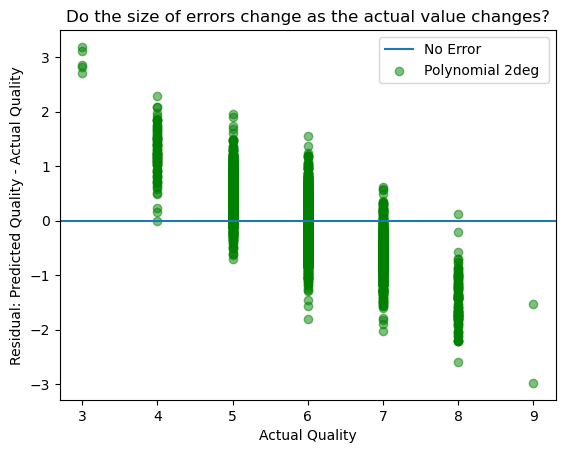

In [24]:
plt.axhline(label="No Error")

# plt.scatter(y_tr, pred_lr_tr - y_tr, alpha=.5, color="red", label="LinearRegression")
# plt.scatter(y_tr, pred_glm_tr - y_tr, alpha=.5, color="yellow", label="TweedieRegressor")
plt.scatter(y_tr, pred_pr_tr - y_tr, alpha=.5, color="green", label="Polynomial 2deg ")

plt.legend()
plt.title("Do the size of errors change as the actual value changes?")
plt.xlabel("Actual Quality")
plt.ylabel("Residual: Predicted Quality - Actual Quality")

plt.show()

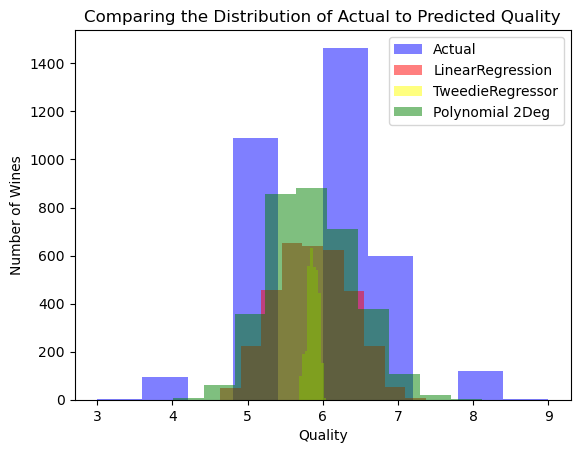

In [31]:
plt.hist(y_tr, color='blue', alpha=.5, label="Actual")
# plt.hist(pred_lr_tr, color='red', alpha=.5, label="LinearRegression")
# plt.hist(pred_glm_tr, color='yellow', alpha=.5, label="TweedieRegressor")
plt.hist(pred_pr_tr, color='green', alpha=.5, label="Polynomial 2Deg")

plt.xlabel("Quality")
plt.ylabel("Number of Wines")
plt.title("Comparing the Distribution of Actual to Predicted Quality")
plt.legend()
plt.show()

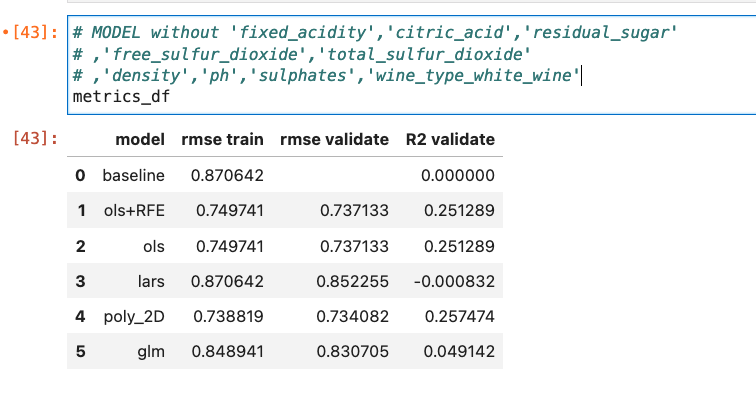

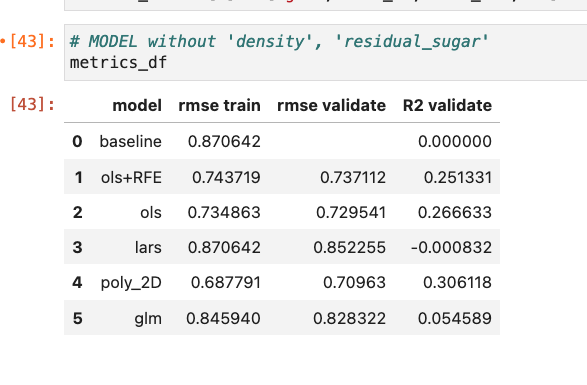

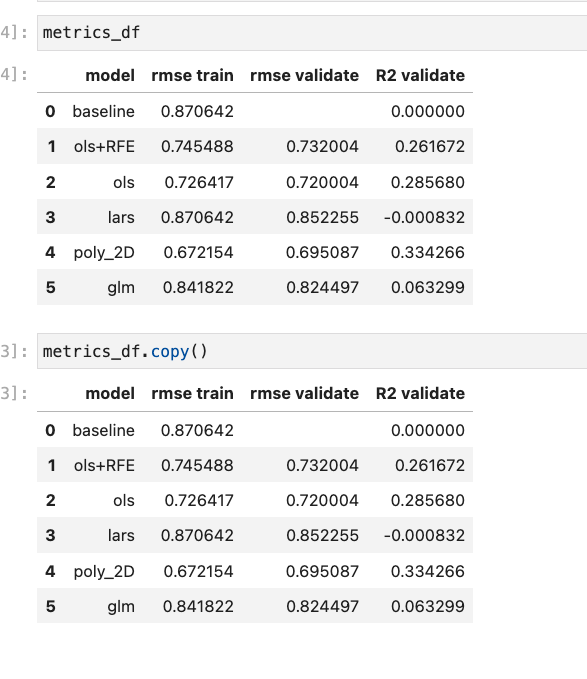